<h1 align='center'> <img src ="https://gifimage.net/wp-content/uploads/2017/11/grafica-gif-1.gif" style='height:50px'/><b>Análisis de datos y Estadísticas</b> <img src="https://reygif.com/media/5/estadistica-negativa-62293.gif" style='height:50px' /></h1>

## ***Librerías***



- <a href="https://pandas.pydata.org/"><img src="https://pandas.pydata.org/docs/_static/pandas.svg" style='height:70px'/></a>
- <a href="https://matplotlib.org/"><img src="https://matplotlib.org/stable/_static/logo2.svg" style='height:50px'/></a>

## ***Lenguaje***

- <a href="https://www.python.org/"><img src="https://www.python.org/static/img/python-logo.png" style='height:50px'>

## **Manejo de archivos** 

### ***Imports necesarios***

In [2]:
import pandas as pd     
import matplotlib.pyplot as plt
import os 

### ***Obtengo la ruta donde se almacena el archivo CSV***

``FOLDER_PATH`` almacena la ruta de la carpeta *analysis_section* 

``EVENTS_PATH`` almacena la ruta del archivo *events.csv*

In [3]:
FOLDER_PATH = os.path.abspath('..')
EVENTS_PATH =  os.path.join(FOLDER_PATH,'src','database','events','events.csv') 

### ***Leo el archivo y lo convierto en Data Frame***

`DATA_FRAME` guarda el el Data Frame creado a partir del archivos csv almacenado en ``csv_events``

En caso de no existir la ruta donde se almacena el csv de los eventos, se crea un Data Frame vacío con sus respectivos Headers, guardándose en ``DATA_FRAME``

In [4]:
if not os.path.exists(EVENTS_PATH):
    DATA_FRAME = pd.DataFrame(columns= ['timestamp','id','usuarie','genero','nivel','cantidad a adivinar','evento','estado','correcta','respuesta'])
    print('No se encontro ningun registro de partidas...')
else:   
    csv_events = pd.read_csv(EVENTS_PATH,encoding='utf-8',keep_default_na='')
    DATA_FRAME = pd.DataFrame(csv_events)

### ***Información sobre el Data Frame***

In [5]:
DATA_FRAME.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            136 non-null    float64
 1   id                   136 non-null    object 
 2   usuarie              136 non-null    object 
 3   genero               136 non-null    object 
 4   nivel                136 non-null    object 
 5   cantidad a adivinar  136 non-null    int64  
 6   evento               136 non-null    object 
 7   estado               136 non-null    object 
 8   correcta             136 non-null    object 
 9   respuesta            136 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 10.8+ KB


### ***Tamaño del Data Frame***

- ***( Filas , Columnas )***

In [6]:
DATA_FRAME.shape

(136, 10)

### ***Cosas interesantes***

- Obtener los primeros, por defecto son **5**

In [7]:
DATA_FRAME.head()

,timestamp,id,usuarie,genero,nivel,cantidad a adivinar,evento,estado,correcta,respuesta
0,1.655993e+09,78bfed7ee2b9441ba19b4d2478139152,Lucas,man,Fácil,10,inicio_partida,,,
1,1.655993e+09,78bfed7ee2b9441ba19b4d2478139152,Lucas,man,Fácil,10,intento,error,Dua Lipa,Naughty Boy
2,1.655993e+09,78bfed7ee2b9441ba19b4d2478139152,Lucas,man,Fácil,10,intento,error,Dua Lipa,Sara Bareilles
3,1.655993e+09,78bfed7ee2b9441ba19b4d2478139152,Lucas,man,Fácil,10,intento,error,Dua Lipa,Years & Years
4,1.655993e+09,78bfed7ee2b9441ba19b4d2478139152,Lucas,man,Fácil,10,intento,ok,Dua Lipa,Dua Lipa


- Obtener los ultimos, por defecto son **5**

In [8]:
DATA_FRAME.tail()

,timestamp,id,usuarie,genero,nivel,cantidad a adivinar,evento,estado,correcta,respuesta
131,1.656091e+09,771dba5913604252b03f5992087ae2bc,Mella,Indefinido,Intermedio,10,intento,error,Oumar Gonzalez,Salih Dursun
132,1.656091e+09,771dba5913604252b03f5992087ae2bc,Mella,Indefinido,Intermedio,10,intento,error,Oumar Gonzalez,Maxime Crépeau
133,1.656091e+09,771dba5913604252b03f5992087ae2bc,Mella,Indefinido,Intermedio,10,intento,error,Oumar Gonzalez,Romain Armand
134,1.656091e+09,771dba5913604252b03f5992087ae2bc,Mella,Indefinido,Intermedio,10,intento,ok,Oumar Gonzalez,Oumar Gonzalez
135,1.656091e+09,771dba5913604252b03f5992087ae2bc,Mella,Indefinido,Intermedio,10,fin,finalizada,,


## **Gráficos y Estadisticas**

### Top 10 de palabras que se encuentran primero de todas las partidas.

- `sub_df` filtra los datos del Data Frame que poseen un estado ``'ok'`` (Acierto) ó ``''`` (Inicio de partida)
 
- `tiempos_palabra` almacena en un lista, una tupla (``tiempo``, ``respuesta correcta``) extraída del Data Frame
 
- El `tiempo` se obtiene mediante el `timestamp` al encontrarse el primer acierto de partida menos `inicio`, una variable, la cual se almacena el timestamp a la hora de iniciar la misma.
 
- También, al encontrar el primer acierto, se guarda la ``respuesta correcta`` correspondiente a este.
 
- Se ordenan los valores y se grafican, para esto, dividimos los valores en 2 listas `tiempos` y `labels`. a las mismas (listas) se les aplica el método ``reverse()``, para un correcto gráfico.

In [9]:
sub_df = DATA_FRAME.loc[:,['timestamp','estado','correcta']]
sub_df = sub_df[(sub_df['estado'] == 'ok')|(sub_df['estado'] == '')]
tiempos_palabra = []
inicio = 0
for intento in sub_df.iloc:
    if intento['estado'] == '':
        inicio = intento['timestamp']
    if (intento['estado'] == 'ok') and (inicio != 0):
        tiempos_palabra.append(((intento['timestamp'] - inicio),intento['correcta']))
        inicio = 0
tiempos_palabra.sort()
tiempos_palabra = tiempos_palabra[:10]
tiempos = []
labels = []
for item in tiempos_palabra:
    tiempos.append(round(item[0],2))
    labels.append(item[1])
tiempos.reverse()
labels.reverse()

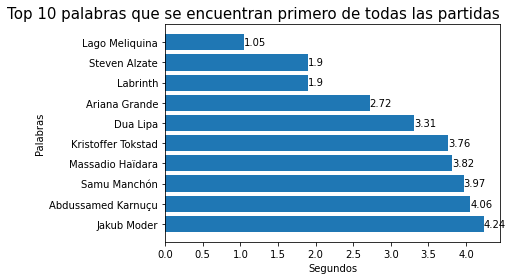

In [10]:
plt.bar_label(plt.barh(labels,tiempos))
plt.title('Top 10 palabras que se encuentran primero de todas las partidas',loc='right',fontsize=15)
plt.ylabel('Palabras',fontsize=10)
plt.xlabel('Segundos',fontsize=10)
plt.show()

### Porcentaje de partidas por estado.

- ``sub_df`` almacena los datos todos los datos de la columna estado.
 
- Se obtienen los cierres inesperados de las partidas, almacenandose en `inesperadas`, restando el total de partidas ``iniciadas ('')`` menos las ``finalizas`` y ``canceladas``. además se agrega a los estados.
 
- Se elimina el estado de inicio de partida ``''`` ya que no se pide su grafico.
 
- Obtenemos la suma ``total`` de los eventos emitidos durante todas las partidas, para posteriormente representar el porcentaje en las ``labels``.
 
- Verificamos que el total no sea 0 (En el caso de un Data Frame vacío) y luego graficamos graficamos.

In [11]:
sub_df = DATA_FRAME.loc[:,'estado']
estados = sub_df.value_counts()
inesperadas = (estados.get('',0) - (estados.get('finalizada',0) + estados.get('cancelada',0)))
estados['inesperadas'] = inesperadas
if '' in estados:
    estados.pop('')

**Parametros - Grafico Pie ** 
- `startangle` = Define el angulo del grafico en 90°.
- ``shadow`` = Agrega sombra al grafico.
- ``wedgeprops`` = Por medio de un diccionarios personalizamos el grafico.

**A los siguientes graficos de tipo pie compartiran el mismo estilo**

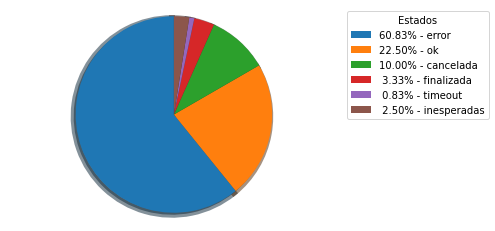

In [12]:
total = sum(estados.values)
if total != 0:
    plt.pie(estados,
    startangle = 90,
    shadow = True,
    wedgeprops = {'linewidth': 6},
    )
    labels = [f"{(valor/total)*100:5.2f}% - {estado}" for estado,valor in estados.items()]
    plt.legend(labels,bbox_to_anchor=(1,1),title='Estados')
    plt.axis('equal')
    plt.show()

### Porcentaje de partidas finalizadas según género

- `sub_df` almacena los datos de las columnas `genero` y `estado`.

- Aplicacamos ``title case``, para no poseer invovenientes a la hora de procesar los géneros.

- Filtramos la información de ``estado`` para obtener las partidas ``finalizadas``

In [13]:
sub_df = DATA_FRAME.loc[:,["genero","estado"]]
sub_df['genero'] = sub_df['genero'].apply(lambda genero: genero.title())
sub_df = sub_df[sub_df['estado']=='finalizada']

- Obtenos los géneros y sus respectivos valores

In [14]:
cant_x_genero = sub_df['genero'].value_counts()

**Al Gráfico Pie le agregamos**
- ``autopct``= Agrega el valor porcentual de los datos. 
  - **% = indica que de tipo porcentual**
  - **0.1 = indica la cantidad de decimales agregados**
  - **f = para darle formato porcentual**

**A la Leyenda le pasamos**  
- ``bbox_to_anchor`` = Posiciona fuera del grafico sus respectivas leyendas.


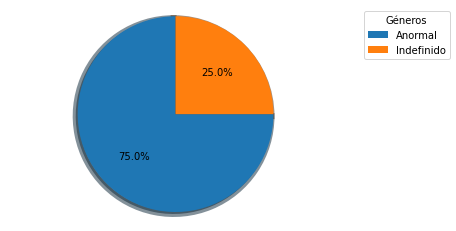

In [15]:
plt.pie(cant_x_genero.values,
startangle = 90,
shadow = True,
wedgeprops = {'linewidth': 6},
autopct='%1.1f%%')
plt.legend(cant_x_genero.index,title='Géneros',bbox_to_anchor=(1.05,1))
plt.axis('equal')
plt.show()

### Porcentaje de partidas finalizadas según el nivel de dificultad

- `sub_df` almacena los datos de las columnas `nivel` y `estado`.
- Filtramos la información de ``estado`` para obtener las partidas finalizadas.
- Obtenemos los ``niveles de dificuldad`` y sus respectivos valores.

In [16]:
sub_df = DATA_FRAME.loc[:,["nivel","estado"]]
sub_df = sub_df[sub_df['estado'] == 'finalizada']
cant_x_dificultad = sub_df['nivel'].value_counts()

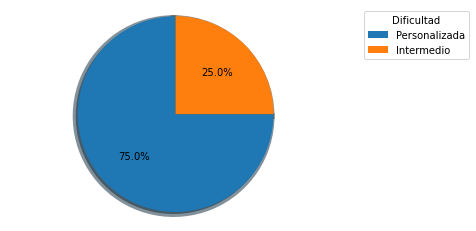

In [17]:
plt.pie(cant_x_dificultad.values,
startangle = 90,
shadow = True,
wedgeprops = {'linewidth': 6},
autopct='%1.1f%%')#
plt.legend(cant_x_dificultad.index,title='Dificultad',bbox_to_anchor=(1.05,1),)
plt.axis('equal')
plt.show()

### Duración total por partida. 

In [18]:
inicios = []
finales = []
for partida in DATA_FRAME.iloc:
    if partida['evento'] == 'inicio_partida':inicios.append(partida['timestamp'])
    elif partida['evento'] == 'fin':finales.append(partida['timestamp'])
tiempos_de_partidas = [
    round((end - start)/60, 2) 
    for start,end in zip(inicios,finales)
]

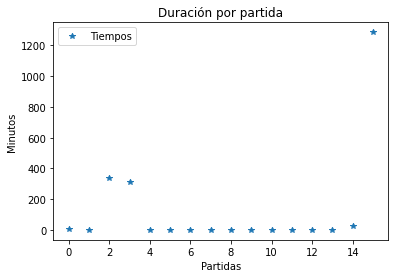

In [19]:
plt.xlabel('Partidas')
plt.ylabel('Minutos')
plt.title(f'Duración por partida')
plt.plot(tiempos_de_partidas,label='Tiempos',marker= "*" if len(tiempos_de_partidas) < 50 else ',',
linestyle='',fillstyle='top')
plt.legend()
plt.show()

### Tiempo de la respuesta exitosa más rápida. 

- `sub_df` almacena los datos de ``timestamp``,``correcta`` y ``respuesta``
- Debemos sacar un valor mínimo por eso inicializamos `mejor_tiempo` en un valor alto.
Además, tenemos 2 variables para guardar la ``ultima correcta`` y el ``ultimo timestamp``, así comparar más adelante.
- `inicio` almacena el timestamp al comenzar una nueva ronda.
- Cuando la respuesta correcta es igual a la elegida y distinta a ``''``, significa que es un acierto, por lo tanto calculamos el tiempo y luego verificando si es menor que los anteriores.
- Posteriormente graficamos.

In [20]:
sub_df = DATA_FRAME.loc[:,['timestamp','correcta','respuesta']]
mejor_tiempo = 10000.0
ult_correcta = ''
ult_timestamp = 0
inicio = 0
for intento in sub_df.iloc:
    act_time = intento['timestamp']
    if (intento['correcta'] == intento['respuesta']):
        if (intento['correcta'] != ''):
            mejor_tiempo = min(mejor_tiempo, act_time - inicio)
        inicio = act_time
    elif(intento['correcta'] != ult_correcta):
        inicio = ult_timestamp
    ult_timestamp = act_time
    ult_correcta = intento['correcta']
mejor_tiempo = round(mejor_tiempo,4)
print(f'{ mejor_tiempo = } segundos')

 mejor_tiempo = 0.7076 segundos


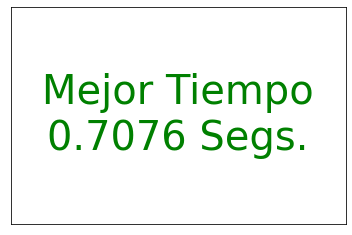

In [32]:
if mejor_tiempo != 10000.0:
    plt.text(0.5, 0.5, (f'Mejor Tiempo\n{mejor_tiempo} Segs.'), size=40.,
            ha="center", va="center",
            c = 'Green'
            )
plt.xticks([])
plt.yticks([])
plt.show()

### Promedio de tiempo de respuesta para respuestas exitosas. 

Muy similar al gráfico anterior .
- `sub_df` almacena los datos de ``timestamp``,``correcta`` y ``respuesta``
- Almacenamos todos los ``tiempos`` en una lista.
- Si la lista posee al menos un elemento, obtenemos el ``tiempo promedio``
- Posteriormente graficamos.

In [22]:
sub_df = DATA_FRAME.loc[:,['timestamp','correcta','respuesta']]
tiempos = []
ult_correcta = ''
inicio = 0
ult_timestamp = 0
for intento in sub_df.iloc:
    act_time = intento['timestamp']
    if (intento['correcta'] == intento['respuesta']):
        if (intento['correcta'] != ''):
            tiempos.append(act_time - inicio) 
        inicio = act_time
    elif(intento['correcta'] != ult_correcta):
        inicio = ult_timestamp
    ult_timestamp = act_time
    ult_correcta = intento['correcta']
tiempo_promedio = 0
if len(tiempos) !=0:
    tiempo_promedio = round(sum(tiempos)/len(tiempos),2)
    print(f'{tiempo_promedio = } Segundos')

tiempo_promedio = 7.44 Segundos


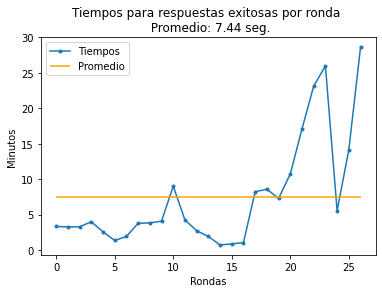

In [23]:
plt.plot(tiempos,label='Tiempos',marker= '.' if len(tiempos) < 50 else ',')
if (tiempo_promedio!=0):
    plt.hlines(tiempo_promedio,0,(len(tiempos)-1),label="Promedio",colors='orange')
plt.title(f'Tiempos para respuestas exitosas por ronda \n Promedio: {tiempo_promedio} seg.')
plt.xlabel('Rondas')
plt.ylabel('Minutos')
plt.legend()
plt.show()

### Promedio de tiempo de partida general. 

- `sub_df` almacena los datos de ``timestamp`` y `evento`
- Almacenamos los ``tiempos`` de todas las partidas.
- Poseemos 2 variables que almacenan, el `inicio` de la partida y el ``último timestamp``, además una tercera que almacena el ``timestamp actual``.
- Iremos agregando a tiempos la resta entre el ``último timestamp`` y el ``inicio``.
- Actualizamos el ``inicio`` con el ``timestamp actual`` para una próxima partida.
- al terminar "Normalmente" la iteración, verificamos si el evento es distinto a el `inicio de partida`, para obtener el tiempo de la última partida en el archivo de datos.
- Posteriormente obtenemos el ``promedio``, sencillamente, dividiendo la suma de los tiempos por la cantidad de los mismos (distinta a 0).
- Por último graficamos.

In [42]:
sub_df = DATA_FRAME.loc[:,['timestamp','evento']]
tiempos = []
inicio = 0
ult_timestamp = 0
for intento in sub_df.iloc:
    act_time = intento['timestamp']
    if (intento['evento'] == 'inicio_partida'):
        tiempos.append((ult_timestamp-inicio)/60)
        inicio = act_time
    ult_timestamp = act_time
else:
    if (intento['evento'] != 'inicio_partida'):
        tiempos.append((ult_timestamp-inicio)/60)
tiempos.pop(0)
promedio = sum(tiempos)/(len(tiempos) if tiempos else 1)
print(f'{(promedio):.2f} minutos es el tiempo promedio que dura una partida')

0.32 minutos es el tiempo promedio que dura una partida


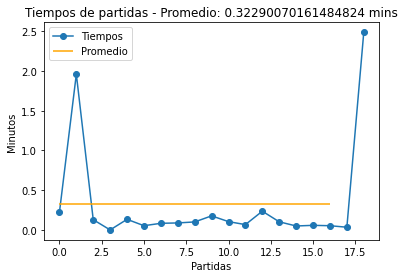

In [43]:
plt.xlabel('Partidas')
plt.ylabel('Minutos')
plt.title(f'Tiempos de partidas - Promedio: {promedio} mins')
plt.plot(tiempos,label='Tiempos',marker= 'o' if len(tiempos_de_partidas) < 50 else ',')
plt.hlines(promedio,0,(len(tiempos_de_partidas)),label="Promedio",colors='orange')
plt.legend()
plt.show()

### Porcentaje de aciertos por usuarie. 

- `sub_df` almacena los datos que poseen un estado igual a `error` o `ok`.
- En `intentos por usuarie` se almacenan los valores de los recién mencionados estados, para cada usuario.
- Por medio de un ``dict comprehension``  relacionamos y guardamos estos datos.
- Posteriormente graficamos.

In [26]:
sub_df = DATA_FRAME.loc[:,['usuarie','estado']]
sub_df = sub_df[(sub_df['estado'] == 'error') | (sub_df['estado'] == 'ok')]
intentos_x_usuarie = sub_df.value_counts()
intentos_x_usuarie = {
    usuarie: tuple(intentos_x_usuarie[usuarie,estado]
    for estado in sub_df['estado'].unique()) 
    for usuarie in sub_df['usuarie'].unique()
}
print(f"Errores y Aciertos por Usuarie - {intentos_x_usuarie}")

Errores y Aciertos por Usuarie - {'Lucas': (54, 11), 'pepe': (12, 6), 'Mella': (7, 10)}


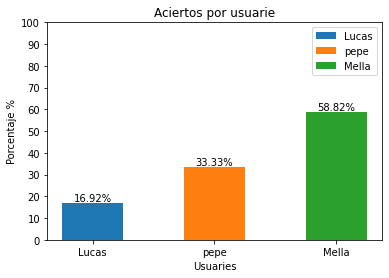

In [27]:
for usuarie,intentos in intentos_x_usuarie.items():
    plt.bar_label(plt.bar(usuarie,(intentos[1]/sum(intentos)*100),width=0.5,label=usuarie,),[str(round(intentos[1]/sum(intentos)*100,2)) + '%'])
plt.title('Aciertos por usuarie')
plt.legend()
plt.xlabel('Usuaries')
plt.ylabel('Porcentaje %')
plt.yticks([x for x in range(101) if x % 10 == 0])    
plt.show()

### Cantidad de tarjetas para las que el usuarie no dió respuesta (timeout). **DOCUMENTAR**

- `sub_df` almacena los datos que poseen un estado igual a `timeout` (fin del tiempo)
- Un ``dict comprehension`` se queda con los valores. 
- Posteriormente, mediante un `for`, extraemos usuario y valores para graficar. 

In [46]:
sub_df = DATA_FRAME.loc[:,['estado','usuarie']]
sub_df = sub_df[sub_df['estado'] == 'timeout']
timeout_por_usuarie = {
    usuarie:sub_df[sub_df['usuarie'] == usuarie]  
    for usuarie in sub_df['usuarie'].unique() 
}

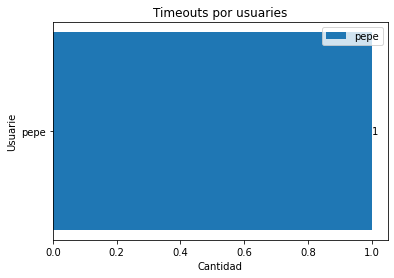

In [29]:
plt.title('Timeouts por usuaries')
plt.ylabel('Usuarie')
plt.xlabel('Cantidad')
for usuario,df in timeout_por_usuarie.items():
    plt.bar_label(plt.barh(usuario,len(df.index),height=0.1,label=f"{usuario}"),[len(df.index)])
plt.legend()
plt.show()

### Cantidad de tarjetas en las que el usuarie dió una respuesta errónea. **DOCUMENTAR**

- `sub_df` almacena los datos que poseen un estado igual a `error`. 
- Un ``dict comprehension`` se queda con los valores en forma de tupla (usuarie,cantida de errores). 
- Posteriormente, mediante un `for` extraemos lo valores y graficamos. 

In [50]:
sub_df = DATA_FRAME.loc[:,['id','estado','usuarie','correcta']]
sub_df = sub_df[sub_df['estado'] == 'error']
errores_x_usuarie = {
    usuarie:sub_df[sub_df['usuarie'] == usuarie] 
    for usuarie in sub_df['usuarie'].unique()
}
errores_x_usuarie = (
    (usuarie,len(df.value_counts())) 
    for usuarie,df in errores_x_usuarie.items()
)

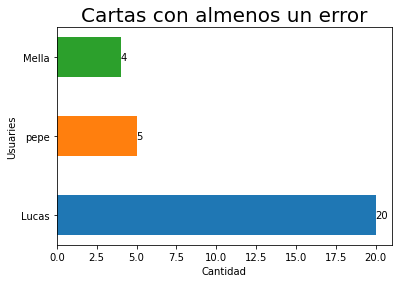

In [51]:
plt.title('Cartas con almenos un error',fontsize=20,loc='center')
plt.xlabel('Cantidad')
plt.ylabel('Usuaries')
for usuarie,cant in errores_x_usuarie :
    plt.bar_label(plt.barh(usuarie,cant,height=0.5,label=f"{usuarie}"),[cant])
plt.show()